In [16]:
import tensorflow as tf
import keras

from keras import layers
from keras import models
from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt

In [17]:
num_classes = 7     # angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5

# define CNN model
model = models.Sequential()

# 1st convolution layer
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(layers.MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

# 2nd convolution layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(layers.Flatten())

# fully connected neural networks
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.load_weights('facial_expression_model_weights.h5') #load weights


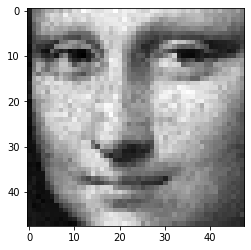

In [36]:
filePath = "monalisa.png"
#filePath = "jackman.png"
img = image.load_img(filePath, color_mode="grayscale", target_size=(48, 48))
plt.imshow(img)
plt.show()

prediction: [[2.5521880e-02 1.4225120e-07 3.4006674e-02 1.0023138e-02 4.6387682e-04
  2.5216637e-03 9.2746270e-01]]
angry : 0.03
disgust : 0.0
fear : 0.03
happy : 0.01
sad : 0.0
surprise : 0.0
neutral : 0.93
top prediction: neutral


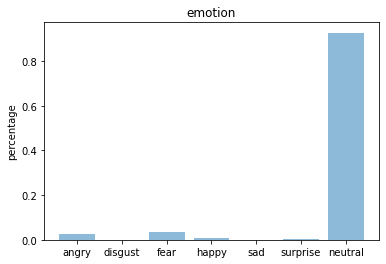

In [39]:
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

# function for drawing bar chart for emotion preditions
def emotion_analysis(emotion):
    y_pos = np.arange(len(emotions))
    plt.bar(y_pos, emotion, align='center', alpha=0.5)
    plt.xticks(y_pos, emotions)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X, axis = 0)
X /= 255

y = model.predict(X)
print("prediction:", y)

for i in range(len(y[0])):
    print(emotions[i], ":", round(y[0][i], 2))

max_y = np.argmax(y)
print('top prediction:', emotions[max_y])
emotion_analysis(y[0])